In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
X,Y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

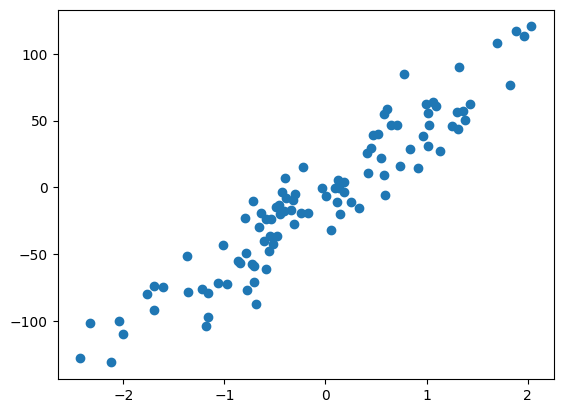

In [ ]:
plt.scatter(X,Y)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

In [ ]:
print(lr.coef_)
print(lr.intercept_)
print('R2 score :',r2_score(Y_test,y_pred))
print(np.mean(cross_val_score(lr,X,Y,scoring='r2',cv=10)))


[51.74951648]
-4.325634622858348
R2 score : 0.9269723917972045
0.8571744647608573


# **OWN GRADIENT DESCENT CLASS**

In [ ]:
class GDRegressor:
     def __init__(self,learning_rate,epochs):
         self.epochs=epochs
         self.m=100
         self.b=-120
         self.learning_rate=learning_rate

     def fit(self,X,Y):
         for i in range(self.epochs):
             loss_slope_b=-2*np.sum(Y-self.m*X.ravel()-self.b)
             loss_slope_m=-2*np.sum((Y-self.m*X.ravel()-self.b)*X.ravel())
             self.b=self.b-self.learning_rate*loss_slope_b
             self.m=self.m-self.learning_rate*loss_slope_m
         print(self.m,self.b)

     def predict(self,X):
         return self.m*X+self.b


In [ ]:
gd=GDRegressor(0.001,100)
gd.fit(X,Y)

52.53425389822134 -4.342685729781507


In [ ]:
y_pred=gd.predict(X_test)
print('R2 score :',r2_score(Y_test,y_pred))

R2 score : 0.9283987640904423
